In [3]:
import sys
import sklearn
import matplotlib
import numpy
import pandas
import seaborn
import fix_yahoo_finance
import datetime

print('Python: {}'.format(sys.version))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Yahoo Finance: {}'.format(fix_yahoo_finance.__version__))

Python: 3.7.2 (tags/v3.7.2:9a3ffc0492, Dec 23 2018, 22:20:52) [MSC v.1916 32 bit (Intel)]


Sklearn: 0.20.3
Matplotlib: 3.0.3
Numpy: 1.16.2
Pandas: 0.24.2
Seaborn: 0.9.0
Yahoo Finance: 0.0.22


In [4]:
# importing the necessary packages
from numpy import *
import fix_yahoo_finance as yf
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

In [5]:
#   Initial Date for the Data Collection
init_date = '2000-1-1'

In [7]:
#   For setting end date as today
now = datetime.datetime.now()
print(now)

2019-04-22 20:55:22.874951


In [5]:
#   For setting end date as today
now = datetime.datetime.now()

In [8]:
#   Fromatting end_date as required format
end_date = str(now.year)+'-'+str(now.month)+'-'+str(now.day)
print(end_date)

2019-4-22


In [9]:
#   Downloading Historical data for GOLD from Yahoo Finances API
frame = yf.download('GLD',init_date, end_date)

[                       0%                       ]

[*********************100%***********************]  1 of 1 downloaded

In [10]:
print(frame)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-11-18   44.430000   44.490002   44.070000   44.380001   44.380001   
2004-11-19   44.490002   44.919998   44.470001   44.779999   44.779999   
2004-11-22   44.750000   44.970001   44.740002   44.950001   44.950001   
2004-11-23   44.880001   44.919998   44.720001   44.750000   44.750000   
2004-11-24   44.930000   45.049999   44.790001   45.049999   45.049999   
2004-11-26   45.250000   45.599998   45.060001   45.290001   45.290001   
2004-11-29   45.099998   45.500000   45.080002   45.400002   45.400002   
2004-11-30   45.369999   45.410000   44.820000   45.119999   45.119999   
2004-12-01   45.279999   45.590000   45.259998   45.380001   45.380001   
2004-12-02   45.549999   45.570000   44.680000   44.950001   44.950001   
2004-12-03   45.040001   46.000000   44.799999   45.599998   45.599998   
2004-12-06   45.389999   45.470001   4

In [11]:
#   Only Wanted the Closing Price                                                  
frame = frame[['Close']]
print(frame)

                 Close
Date                  
2004-11-18   44.380001
2004-11-19   44.779999
2004-11-22   44.950001
2004-11-23   44.750000
2004-11-24   45.049999
2004-11-26   45.290001
2004-11-29   45.400002
2004-11-30   45.119999
2004-12-01   45.380001
2004-12-02   44.950001
2004-12-03   45.599998
2004-12-06   45.169998
2004-12-07   45.110001
2004-12-08   44.009998
2004-12-09   43.779999
2004-12-10   43.439999
2004-12-13   43.910000
2004-12-14   43.549999
2004-12-15   43.990002
2004-12-16   43.680000
2004-12-17   44.189999
2004-12-20   44.340000
2004-12-21   44.220001
2004-12-22   44.020000
2004-12-23   44.270000
2004-12-27   44.480000
2004-12-28   44.369999
2004-12-29   43.660000
2004-12-30   43.830002
2004-12-31   43.799999
...                ...
2019-03-08  122.839996
2019-03-11  122.239998
2019-03-12  122.980003
2019-03-13  123.839996
2019-03-14  122.410004
2019-03-15  122.970001
2019-03-18  123.040001
2019-03-19  123.379997
2019-03-20  124.180000
2019-03-21  123.680000
2019-03-22 

In [13]:
#   Drop Rows with NULL Data                                                                        
frame = frame.dropna()
print(frame)

                 Close
Date                  
2004-11-18   44.380001
2004-11-19   44.779999
2004-11-22   44.950001
2004-11-23   44.750000
2004-11-24   45.049999
2004-11-26   45.290001
2004-11-29   45.400002
2004-11-30   45.119999
2004-12-01   45.380001
2004-12-02   44.950001
2004-12-03   45.599998
2004-12-06   45.169998
2004-12-07   45.110001
2004-12-08   44.009998
2004-12-09   43.779999
2004-12-10   43.439999
2004-12-13   43.910000
2004-12-14   43.549999
2004-12-15   43.990002
2004-12-16   43.680000
2004-12-17   44.189999
2004-12-20   44.340000
2004-12-21   44.220001
2004-12-22   44.020000
2004-12-23   44.270000
2004-12-27   44.480000
2004-12-28   44.369999
2004-12-29   43.660000
2004-12-30   43.830002
2004-12-31   43.799999
...                ...
2019-03-08  122.839996
2019-03-11  122.239998
2019-03-12  122.980003
2019-03-13  123.839996
2019-03-14  122.410004
2019-03-15  122.970001
2019-03-18  123.040001
2019-03-19  123.379997
2019-03-20  124.180000
2019-03-21  123.680000
2019-03-22 

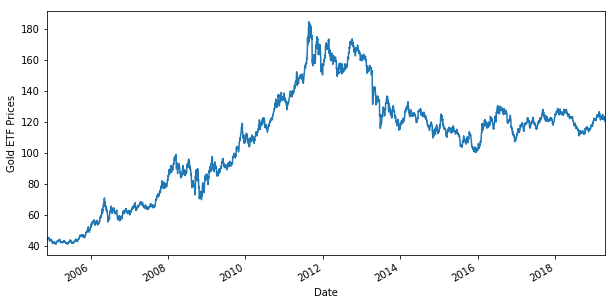

In [14]:
# Plot the closing price of GLD 
frame.Close.plot(figsize=(10,5))
plt.ylabel("Gold ETF Prices")
plt.show()

In [16]:
# Define explanatory variables
frame['S_3'] = frame['Close'].shift(1).rolling(window=3).mean()
frame['S_9'] = frame['Close'].shift(1).rolling(window=9).mean()
print(frame['S_3'], frame['S_9'])

Date
2004-11-18           NaN
2004-11-19           NaN
2004-11-22           NaN
2004-11-23     44.703334
2004-11-24     44.826667
2004-11-26     44.916667
2004-11-29     45.030000
2004-11-30     45.246667
2004-12-01     45.270001
2004-12-02     45.300001
2004-12-03     45.150000
2004-12-06     45.310000
2004-12-07     45.239999
2004-12-08     45.293332
2004-12-09     44.763332
2004-12-10     44.299999
2004-12-13     43.743332
2004-12-14     43.709999
2004-12-15     43.633333
2004-12-16     43.816667
2004-12-17     43.740000
2004-12-20     43.953334
2004-12-21     44.070000
2004-12-22     44.250000
2004-12-23     44.193334
2004-12-27     44.170000
2004-12-28     44.256667
2004-12-29     44.373333
2004-12-30     44.170000
2004-12-31     43.953334
                 ...    
2019-03-08    121.613335
2019-03-11    121.986666
2019-03-12    122.196665
2019-03-13    122.686666
2019-03-14    123.019999
2019-03-15    123.076668
2019-03-18    123.073334
2019-03-19    122.806669
2019-03-20    123.13

In [17]:
frame = frame.dropna()
X = frame[['S_3','S_9']]
X.head()

,S_3,S_9
Date,,
2004-12-02,45.300001,45.011111
2004-12-03,45.150000,45.074445
2004-12-06,45.310000,45.165556
2004-12-07,45.239999,45.190000
2004-12-08,45.293332,45.230000


In [18]:
# Define dependent variable
y = frame['Close']
y.head()

Date
2004-12-02    44.950001
2004-12-03    45.599998
2004-12-06    45.169998
2004-12-07    45.110001
2004-12-08    44.009998
Name: Close, dtype: float64

In [19]:
# Split the data into train and test dataset
t = .8
t = int(t*len(frame))
print(t)

2895


In [20]:
# Train dataset
X_train = X[:t]
y_train = y[:t]
print("X-Train : ", X_train)
print("Y-Train : ", y_train)

X-Train :                     S_3         S_9
Date                              
2004-12-02   45.300001   45.011111
2004-12-03   45.150000   45.074445
2004-12-06   45.310000   45.165556
2004-12-07   45.239999   45.190000
2004-12-08   45.293332   45.230000
2004-12-09   44.763332   45.114444
2004-12-10   44.299999   44.946666
2004-12-13   43.743332   44.728888
2004-12-14   43.709999   44.594444
2004-12-15   43.633333   44.391110
2004-12-16   43.816667   44.284444
2004-12-17   43.740000   44.071111
2004-12-20   43.953334   43.962222
2004-12-21   44.070000   43.876666
2004-12-22   44.250000   43.900000
2004-12-23   44.193334   43.926667
2004-12-27   44.170000   44.018889
2004-12-28   44.256667   44.082222
2004-12-29   44.373333   44.173333
2004-12-30   44.170000   44.136667
2004-12-31   43.953334   44.153333
2005-01-03   43.763334   44.110000
2005-01-04   43.550000   43.963333
2005-01-05   43.186667   43.798889
2005-01-06   42.810000   43.648889
2005-01-07   42.520001   43.413334
2005-01-1

In [53]:
# Test dataset
X_test = X[t:]
y_test = y[t:]
print("X-Test: {}  Y-Test: {}  ".format(X_test, y_test))

X-Test:                     S_3          S_9
Date                                
2017-08-24  2750.000000  2750.000000
2017-08-28  2750.000000  2750.000000
2017-08-29  2750.000000  2750.000000
2017-08-30  2750.000000  2750.000000
2017-08-31  2750.000000  2750.000000
2017-09-01  2750.000000  2750.000000
2017-09-04  2750.000000  2750.000000
2017-09-05  2750.000000  2750.000000
2017-09-06  2750.000000  2750.000000
2017-09-07  2750.000000  2750.000000
2017-09-08  2750.000000  2750.000000
2017-09-11  2750.000000  2750.000000
2017-09-12  2750.000000  2750.000000
2017-09-13  2750.000000  2750.000000
2017-09-14  2750.000000  2750.000000
2017-09-15  2750.000000  2750.000000
2017-09-18  2750.000000  2750.000000
2017-09-19  2750.000000  2750.000000
2017-09-20  2750.000000  2750.000000
2017-09-21  2750.000000  2750.000000
2017-09-22  2750.000000  2750.000000
2017-09-25  2750.000000  2750.000000
2017-09-26  2750.000000  2750.000000
2017-09-27  2750.000000  2750.000000
2017-09-28  2750.000000  2750.

In [40]:
# Create a linear regression model
linear = LinearRegression().fit(X_train,y_train)
print ("Linear Regression equation")
print ("Gold ETF Price (y) =", \
round(linear.coef_[0],2), "* 3 Days Moving Average (x1)", \
round(linear.coef_[1],2), "* 9 Days Moving Average (x2) +", \
round(linear.intercept_,2), "(constant)")

Linear Regression equation
Gold ETF Price (y) = 1.2 * 3 Days Moving Average (x1) -0.2 * 9 Days Moving Average (x2) + 0.21 (constant)


In [39]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
print('Predicted Price : ',predicted_price[len(predicted_price)-1])
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])

NameError: name 'X_test' is not defined

In [33]:
predicted_price.plot(figsize=(20,5))
X_test.plot()
plt.legend(['predicted_price','actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [57]:
# R square
r2_score = linear.score(X[t:],y[t:])*100
float("{0:.2f}".format(r2_score))
print(r2_score)

88.58179127293893
